In [1]:
import cv2
import numpy as np

In [2]:
#灰度化
def BGR2GRAY(img):
    b = img[:,:,0].copy()
    g = img[:,:,1].copy()
    r = img[:,:,2].copy()
    gray = (0.2126 * r + 0.7152 * g + 0.0722 * b).astype(np.uint8) #一定要变成uint8哦
    return gray

In [3]:
#二值化
def binarization(img, threshold):
    output = 255 * (img >= threshold)
    return output.astype(np.uint8) #一定要变成uint8哦

In [4]:
#ostu算法原理讲解推荐https://blog.csdn.net/weixin_40647819/article/details/90179953和https://zhuanlan.zhihu.com/p/95034826这两篇博文
def ostu(img_gray):
    pixel_num = img_gray.shape[0]*img_gray.shape[1]
    max_threshold = 0
    max_g = 0
    for k in range(256):
        n0 = img_gray[np.where(img_gray < k)]
        n1 = img_gray[np.where(img_gray >= k)]
        w0 = len(n0)/pixel_num
        w1 = len(n1)/pixel_num
        u0 = n0.sum()/len(n0) if len(n0) > 0 else 0 #防止分母为0,这里用np.mean求均值也可
        u1 = n1.sum()/len(n1) if len(n0) > 0 else 0 

        g = w0 * w1 * (u0 - u1) ** 2
        if g > max_g:
            max_g = g
            max_threshold = k
    print('最大阈值为：',max_threshold)
    img_gray[img_gray < max_threshold] = 0
    img_gray[img_gray >= max_threshold] = 255
    return binarization(img_gray, max_threshold)



In [5]:
img = cv2.imread(r'D:\Program Files (x86)\ImageProcessing100Wen-master\ImageProcessing100Wen-master\assets\imori.jpg').astype(np.float32)
cv2.imshow('1',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

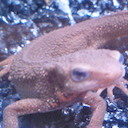

In [6]:
img_gray = BGR2GRAY(img)
img_ostu = ostu(img_gray)

最大阈值为： 127


D:\temp\ipykernel_18116\908435066.py:11: RuntimeWarning: invalid value encountered in true_divide
  u1 = n1.sum()/len(n1) if len(n0) > 0 else 0


In [7]:
cv2.imshow('2',img_ostu)
cv2.waitKey(0)
cv2.destroyAllWindows()

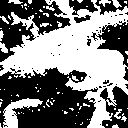
